1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.


Import Library dan Load Data

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('docs/voice.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Menghitung Jumlah tiap Value pada Variabel Label

In [2]:
df['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

Melakukan Encode Variabel Label

In [3]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

Visualisasi Heatmap

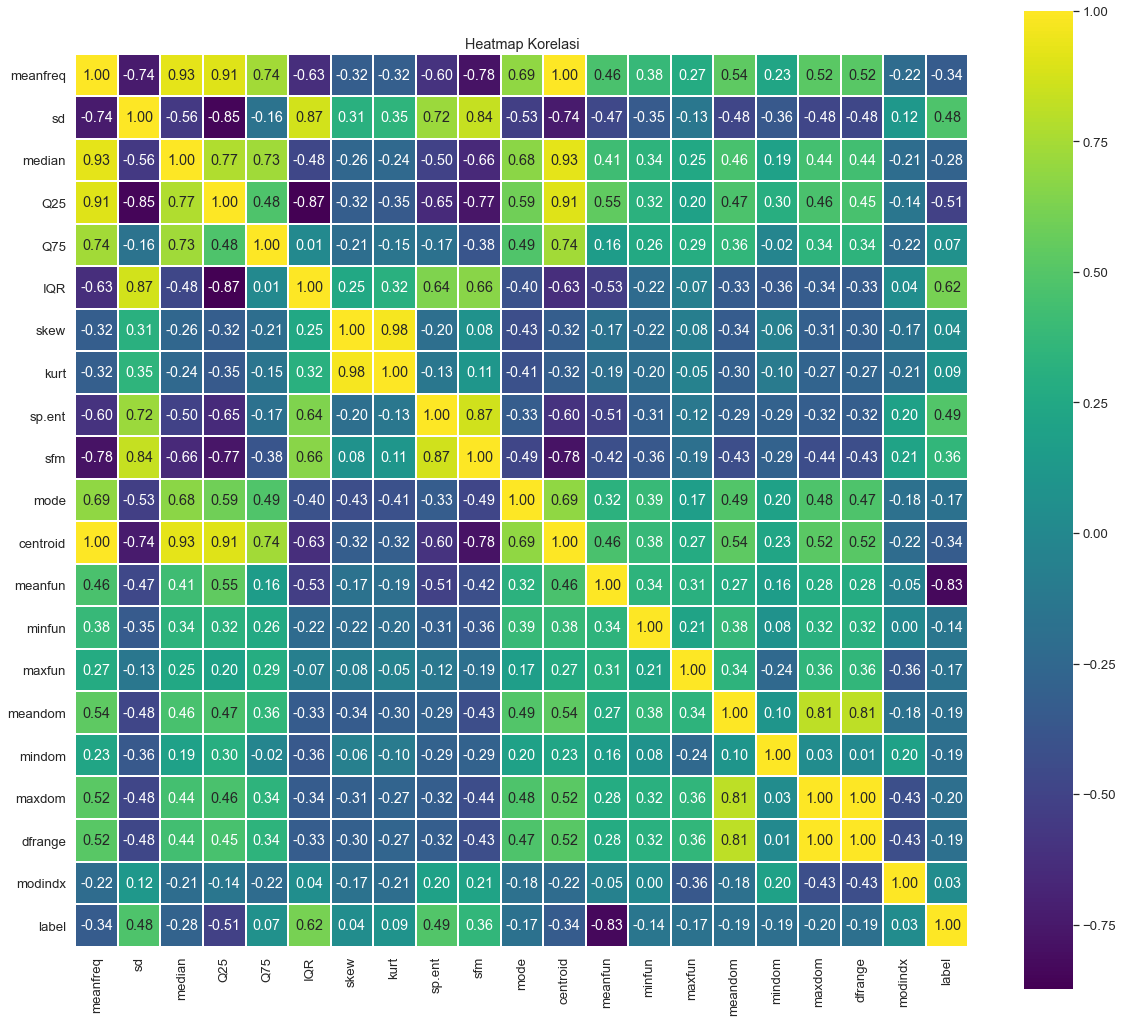

In [4]:
plt.figure(figsize=(20, 18))
corr_matrix = df.corr() 
sns.set(font_scale=1.2) 
sns.heatmap(corr_matrix, 
            cmap='viridis',
            linewidths=1, 
            fmt=".2f",
            annot=True,
            cbar=True, 
            square=True) 

plt.title('Heatmap Korelasi') 
plt.show()

Identifikasi Variabel Independen dan Dependen

In [5]:
X = df.iloc[:,:20]
y = df.label

Split Data Training dan Testing menjadi 70:30

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

In [7]:
x1 = type(X.to_numpy())
x1

numpy.ndarray

Import Model SVM

In [8]:
from sklearn.svm import SVC

# Inisialisasi model SVC
svc_model = SVC(kernel='linear', C=1.0, gamma='scale')

Melatih Model dengan Data Training dan Prediksi dengan Data Testing

In [9]:
# Latih model dengan data pelatihan
svc_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = svc_model.predict(X_test)

Akurasi Model SVM Terhadap Label Sebenarnya dan Hasil Prediksi

In [10]:
from sklearn.metrics import accuracy_score

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Cetak hasil akurasi
print(f'Skor Akurasi : {int(accuracy * 100)}%')

Skor Akurasi : 92%


2. Buatlah model klasifikasi Multinomial Naive Bayes 

Menggunakan data spam.csv

In [12]:
df = pd.read_csv('docs/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Drop Kolom

In [13]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Ubah Nama v1 dan v2

In [14]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Inspeksi Data

In [15]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


Encode Label

In [16]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Mamisahkan Fitur dengan Label

In [17]:
X = df['SMS'].values
y = df['Labels'].values

Fitur CountVectorizer dengan mengaktifkan stop_words

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer(stop_words='english')

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
X_test = bow.transform(X_test)

Evaluasi Hasil

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data test
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train : {acc_train * 100:2f}%')
print(f'Hasil akurasi data test  : {acc_test * 100:2f}%')

Hasil akurasi data train : 99.358974%
Hasil akurasi data test  : 98.325359%


3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

Menggunakan data spam.csv

In [20]:
X = df['SMS'].values
y = df['Labels'].values

Fitur TF-IDF dengan mengaktifkan stop_words

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data training dan testing menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Inisiasi CountVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fitting dan transform X_train dengan TF-IDF
X_train = tfidf.fit_transform(X_train)

# Transform X_test
X_test = tfidf.transform(X_test)

Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data test
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train : {acc_train * 100:f}%')
print(f'Hasil akurasi data test  : {acc_test * 100:f}%')

Hasil akurasi data train : 98.410256%
Hasil akurasi data test  : 96.351675%


4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

Berdasarkan hasil evaluasi terhadap akurasi pada model klasisfikasi Multinominal Naive Bayes menggunakan fitur CountVectorized dan TF-IDF, memiliki perbedaan hasil akurasi, yakni:

1. CountVectorized:

- Akurasi data training: 99.358974%

- Akurasi data test: 98.325359%

2. TF-IDF:

- Akurasi data training: 98.410256%

- Akurasi data tes: 96.351675%

Dari perbandingan tersebut, dapat ditarik kesimpulan bahwa model dengan CountVectorized memiliki akurasi yang lebih tinggi dalam data training maupun testing. Namun model dengan CountVectorized cenderung lebih overfitting pada data training, sedangkan TF_IDF memiliki akurasi yang lebih rendah pada data test, hal ini menunjukkan bahwa model ini mungkin memilii generalisasi yang lebih baik, meskipun akurasi data test nya lebih rendah.

Berdasarkan hasil evaluasi, model dengan CountVectorized memiliki akurasi lebih tinggi pada data training dan testing, namun cenderung overfitting pada data training. Di sisi lain, model dengan TF-IDF memiliki akurasi lebih rendah pada data test, tetapi menunjukkan generalisasi yang lebih baik, menandakan kemungkinan lebih mampu memahami pola umum dari data. Secara keseluruhan, CountVectorized mungkin merupakan pilihan lebih baik karena menghasilkan akurasi lebih tinggi. Namun, pilihan antara dua metode ekstraksi fitur ini sebaiknya disesuaikan dengan karakteristik dataset dan tujuan analisis.